In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
def get_dataset():
    
    prev_dtype = {
        'SK_ID_PREV': np.uint32, 'SK_ID_CURR': np.uint32, 'HOUR_APPR_PROCESS_START': np.int32, 'NFLAG_LAST_APPL_IN_DAY': np.int32,
        'DAYS_DECISION': np.int32, 'SELLERPLACE_AREA': np.int32, 'AMT_ANNUITY': np.float32, 'AMT_APPLICATION': np.float32,
        'AMT_CREDIT': np.float32, 'AMT_DOWN_PAYMENT': np.float32, 'AMT_GOODS_PRICE': np.float32, 'RATE_DOWN_PAYMENT': np.float32,
        'RATE_INTEREST_PRIMARY': np.float32, 'RATE_INTEREST_PRIVILEGED': np.float32, 'CNT_PAYMENT': np.float32,
        'DAYS_FIRST_DRAWING': np.float32, 'DAYS_FIRST_DUE': np.float32, 'DAYS_LAST_DUE_1ST_VERSION': np.float32,
        'DAYS_LAST_DUE': np.float32, 'DAYS_TERMINATION': np.float32, 'NFLAG_INSURED_ON_APPROVAL': np.float32
    }
    
    bureau_dtype = {
        'SK_ID_CURR': np.uint32, 'SK_ID_BUREAU': np.uint32, 'DAYS_CREDIT': np.int32,'CREDIT_DAY_OVERDUE': np.int32,
        'CNT_CREDIT_PROLONG': np.int32, 'DAYS_CREDIT_UPDATE': np.int32, 'DAYS_CREDIT_ENDDATE': np.float32,
        'DAYS_ENDDATE_FACT': np.float32, 'AMT_CREDIT_MAX_OVERDUE': np.float32, 'AMT_CREDIT_SUM': np.float32,
        'AMT_CREDIT_SUM_DEBT': np.float32, 'AMT_CREDIT_SUM_LIMIT': np.float32, 'AMT_CREDIT_SUM_OVERDUE': np.float32,
        'AMT_ANNUITY': np.float32
    }
    
    bureau_bal_dtype = {
        'SK_ID_BUREAU': np.int32, 'MONTHS_BALANCE': np.int32,
    }
    
    pos_dtype = {
        'SK_ID_PREV': np.uint32, 'SK_ID_CURR': np.uint32, 'MONTHS_BALANCE': np.int32, 'SK_DPD': np.int32,
        'SK_DPD_DEF': np.int32, 'CNT_INSTALMENT': np.float32,'CNT_INSTALMENT_FUTURE': np.float32,
    }
    
    install_dtype = {
        'SK_ID_PREV': np.uint32, 'SK_ID_CURR': np.uint32, 'NUM_INSTALMENT_NUMBER': np.int32, 'NUM_INSTALMENT_VERSION': np.float32,
        'DAYS_INSTALMENT': np.float32, 'DAYS_ENTRY_PAYMENT': np.float32, 'AMT_INSTALMENT': np.float32, 'AMT_PAYMENT': np.float32,
    }
    
    card_dtype = {
        'SK_ID_PREV': np.uint32, 'SK_ID_CURR': np.uint32, 'MONTHS_BALANCE': np.int16,
        'AMT_CREDIT_LIMIT_ACTUAL': np.int32, 'CNT_DRAWINGS_CURRENT': np.int32, 'SK_DPD': np.int32,'SK_DPD_DEF': np.int32,
        'AMT_BALANCE': np.float32, 'AMT_DRAWINGS_ATM_CURRENT': np.float32, 'AMT_DRAWINGS_CURRENT': np.float32,
        'AMT_DRAWINGS_OTHER_CURRENT': np.float32, 'AMT_DRAWINGS_POS_CURRENT': np.float32, 'AMT_INST_MIN_REGULARITY': np.float32,
        'AMT_PAYMENT_CURRENT': np.float32, 'AMT_PAYMENT_TOTAL_CURRENT': np.float32, 'AMT_RECEIVABLE_PRINCIPAL': np.float32,
        'AMT_RECIVABLE': np.float32, 'AMT_TOTAL_RECEIVABLE': np.float32, 'CNT_DRAWINGS_ATM_CURRENT': np.float32,
        'CNT_DRAWINGS_OTHER_CURRENT': np.float32, 'CNT_DRAWINGS_POS_CURRENT': np.float32, 'CNT_INSTALMENT_MATURE_CUM': np.float32,
    }
    
    app_train = pd.read_csv('../data/home-credit-default-risk/application_train.csv')
    app_test = pd.read_csv('../data/home-credit-default-risk/application_test.csv')
    apps = pd.concat([app_train, app_test])
    prev = pd.read_csv('../data/home-credit-default-risk/previous_application.csv', dtype=prev_dtype)
    bureau = pd.read_csv('../data/home-credit-default-risk/bureau.csv', dtype=bureau_dtype)
    bureau_balance = pd.read_csv('../data/home-credit-default-risk/bureau_balance.csv', dtype=bureau_bal_dtype)
    pos_bal = pd.read_csv('../data/home-credit-default-risk/POS_CASH_balance.csv', dtype=pos_dtype)
    install = pd.read_csv('../data/home-credit-default-risk/installments_payments.csv', dtype=install_dtype)
    card_bal = pd.read_csv('../data/home-credit-default-risk/credit_card_balance.csv', dtype=card_dtype)
    
    return apps, prev, bureau, bureau_balance, pos_bal, install, card_bal

In [4]:
def get_apps_processed(apps):
    apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())
    
    apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY'] / apps['AMT_CREDIT']
    apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE'] / apps['AMT_CREDIT']
    apps['APPS_CREDIT_GOODS_DIFF'] = apps['AMT_CREDIT'] - apps['AMT_GOODS_PRICE']
    
    apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY'] / apps['AMT_INCOME_TOTAL']
    apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT'] / apps['AMT_INCOME_TOTAL']
    apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE'] / apps['AMT_INCOME_TOTAL']
    apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['CNT_FAM_MEMBERS']
    
    apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED'] / apps['DAYS_BIRTH']
    apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_EMPLOYED']
    apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_BIRTH']
    apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']
    apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']
    
    return apps


def get_prev_processed(prev):
    
    prev['PREV_CREDIT_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_CREDIT']
    prev['PREV_GOODS_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_GOODS_PRICE']
    prev['PREV_CREDIT_APPL_RATIO'] = prev['AMT_CREDIT'] / prev['AMT_APPLICATION']
    prev['PREV_ANNUITY_APPL_RATIO'] = prev['AMT_ANNUITY'] / prev['AMT_APPLICATION']
    prev['PREV_GOODS_APPL_RATIO'] = prev['AMT_GOODS_PRICE'] / prev['AMT_APPLICATION']
    
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

    prev['PREV_DAYS_LAST_DUE_DIFF'] = prev['DAYS_LAST_DUE_1ST_VERSION'] - prev['DAYS_LAST_DUE']
    
    all_pay = prev['AMT_ANNUITY'] * prev['CNT_PAYMENT']
    prev['PREV_INTERESTS_RATE'] = (all_pay / prev['AMT_CREDIT'] - 1) / prev['CNT_PAYMENT']
    
    return prev


def get_prev_amt_agg(prev):    

    agg_dict = {
         # 기존 컬럼. 
        'SK_ID_CURR':['count'],
        'AMT_CREDIT':['mean', 'max', 'sum'],
        'AMT_ANNUITY':['mean', 'max', 'sum'], 
        'AMT_APPLICATION':['mean', 'max', 'sum'],
        'AMT_DOWN_PAYMENT':['mean', 'max', 'sum'],
        'AMT_GOODS_PRICE':['mean', 'max', 'sum'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
        # 가공 컬럼
        'PREV_CREDIT_DIFF':['mean', 'max', 'sum'], 
        'PREV_CREDIT_APPL_RATIO':['mean', 'max'],
        'PREV_GOODS_DIFF':['mean', 'max', 'sum'],
        'PREV_GOODS_APPL_RATIO':['mean', 'max'],
        'PREV_DAYS_LAST_DUE_DIFF':['mean', 'max', 'sum'],
        'PREV_INTERESTS_RATE':['mean', 'max']
    }
    
    prev_group = prev.groupby('SK_ID_CURR')
    prev_amt_agg = prev_group.agg(agg_dict)
    prev_amt_agg.columns = ['PREV_' + ('_').join(column).upper() for column in prev_amt_agg.columns.ravel()]
    prev_amt_agg = prev_amt_agg.reset_index()
    
    return prev_amt_agg


def get_prev_refused_appr_agg(prev):

    prev_refused_appr_group = prev[prev['NAME_CONTRACT_STATUS'].isin(['Approved', 'Refused'])].groupby(['SK_ID_CURR', 'NAME_CONTRACT_STATUS'])
    prev_refused_appr_agg = prev_refused_appr_group['SK_ID_CURR'].count().unstack()
    prev_refused_appr_agg = prev_refused_appr_agg.fillna(0)
    prev_refused_appr_agg.columns = ['PREV_APPROVED_COUNT', 'PREV_REFUSED_COUNT']
    prev_refused_appr_agg = prev_refused_appr_agg.reset_index()
    
    return prev_refused_appr_agg


def get_prev_days365_agg(prev):
    cond_days365 = prev['DAYS_DECISION'] > -365
    prev_days365_group = prev[cond_days365].groupby('SK_ID_CURR')
    agg_dict = {
        'SK_ID_CURR':['count'],
        'AMT_CREDIT':['mean', 'max', 'sum'],
        'AMT_ANNUITY':['mean', 'max', 'sum'], 
        'AMT_APPLICATION':['mean', 'max', 'sum'],
        'AMT_DOWN_PAYMENT':['mean', 'max', 'sum'],
        'AMT_GOODS_PRICE':['mean', 'max', 'sum'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],

        'PREV_CREDIT_DIFF':['mean', 'max', 'sum'], 
        'PREV_CREDIT_APPL_RATIO':['mean', 'max'],
        'PREV_GOODS_DIFF':['mean', 'max', 'sum'],
        'PREV_GOODS_APPL_RATIO':['mean', 'max'],
        'PREV_DAYS_LAST_DUE_DIFF':['mean', 'max', 'sum'],
        'PREV_INTERESTS_RATE':['mean', 'max']
    }
    
    prev_days365_agg = prev_days365_group.agg(agg_dict)

    prev_days365_agg.columns = ["PREV_D365_"+ "_".join(x).upper() for x in prev_days365_agg.columns.ravel()]
    
    return prev_days365_agg


def get_prev_agg(prev):
    
    prev = get_prev_processed(prev)
    prev_amt_agg = get_prev_amt_agg(prev)
    prev_refused_appr_agg = get_prev_refused_appr_agg(prev)
    prev_days365_agg = get_prev_days365_agg(prev) # get_prev_days365_agg
    
    prev_agg = prev_amt_agg.merge(prev_refused_appr_agg, on='SK_ID_CURR', how='left')
    prev_agg = prev_agg.merge(prev_days365_agg, on='SK_ID_CURR', how='left') # leftjoin prev_days365_agg
    prev_agg['PREV_REFUSED_RATIO'] = prev_agg['PREV_REFUSED_COUNT'] / prev_agg['PREV_SK_ID_CURR_COUNT']
    prev_agg['PREV_APPROVED_RATIO'] = prev_agg['PREV_APPROVED_COUNT'] / prev_agg['PREV_SK_ID_CURR_COUNT']
    prev_agg = prev_agg.drop(['PREV_REFUSED_COUNT', 'PREV_APPROVED_COUNT'], axis=1)
    
    return prev_agg


def get_apps_all_with_prev_agg(apps, prev):

    apps_all = get_apps_processed(apps)
    prev_agg = get_prev_agg(prev)
    print('prev_agg shape:', prev_agg.shape)
    print('apps_all before merge shape:', apps_all.shape)
    apps_all = apps_all.merge(prev_agg, on='SK_ID_CURR', how='left')
    print('apps_all after merge with prev_agg shape:', apps_all.shape)
    
    return apps_all


bureau_agg_dict = {
    'SK_ID_BUREAU': ['count'],
    'DAYS_CREDIT': ['min', 'max', 'mean'],
    'CREDIT_DAY_OVERDUE': ['min', 'max', 'mean'],
    'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
    'DAYS_ENDDATE_FACT': ['min', 'max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
    'AMT_ANNUITY': ['max', 'mean', 'sum'],

    'BUREAU_ENDDATE_FACT_DIFF': ['min', 'max', 'mean'],
    'BUREAU_CREDIT_FACT_DIFF': ['min', 'max', 'mean'],
    'BUREAU_CREDIT_ENDDATE_DIFF': ['min', 'max', 'mean'],
    'BUREAU_CREDIT_DEBT_RATIO': ['min', 'max', 'mean'],
    'BUREAU_CREDIT_DEBT_DIFF': ['min', 'max', 'mean'],
    'BUREAU_IS_DPD': ['mean', 'sum'],
    'BUREAU_IS_DPD_OVER120': ['mean', 'sum'],
}

bureau_bal_agg_dict = {
    'SK_ID_CURR': ['count'],
    'MONTHS_BALANCE': ['min', 'max', 'mean'],
    'BUREAU_BAL_IS_DPD': ['mean', 'sum'],
    'BUREAU_BAL_IS_DPD_OVER120': ['mean', 'sum'],
}

def get_bureau_processed(bureau):
    
    bureau['BUREAU_ENDDATE_FACT_DIFF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
    bureau['BUREAU_CREDIT_FACT_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_ENDDATE_FACT']
    bureau['BUREAU_CREDIT_ENDDATE_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_CREDIT_ENDDATE']

    bureau['BUREAU_CREDIT_DEBT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['AMT_CREDIT_SUM']
    bureau['BUREAU_CREDIT_DEBT_DIFF'] = bureau['AMT_CREDIT_SUM_DEBT'] - bureau['AMT_CREDIT_SUM']\
    
    bureau['BUREAU_IS_DPD'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 0 else 0)
    bureau['BUREAU_IS_DPD_OVER120'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 120 else 0)
    
    return bureau


def get_bureau_day_amt_agg(bureau):     

    bureau_grp = bureau.groupby('SK_ID_CURR')
    bureau_day_amt_agg = bureau_grp.agg(bureau_agg_dict)
    bureau_day_amt_agg.columns = ['BUREAU_' + ('_').join(column).upper() for column in bureau_day_amt_agg.columns.ravel()]
    bureau_day_amt_agg = bureau_day_amt_agg.reset_index()
    
    return bureau_day_amt_agg


def get_bureau_active_agg(bureau):
    
    cond_active = bureau['CREDIT_ACTIVE'] == 'Active'
    bureau_active_grp = bureau[cond_active].groupby('SK_ID_CURR')
    bureau_active_agg = bureau_active_grp.agg(bureau_agg_dict)
    bureau_active_agg.columns = ['BUREAU_ACT_' + ('_').join(column).upper() for column in bureau_active_agg.columns.ravel()]
    bureau_active_agg = bureau_active_agg.reset_index()
    
    return bureau_active_agg


def get_bureau_days750_agg(bureau):
    cond_days750 = bureau['DAYS_CREDIT'] > -750
    bureau_days750_group = bureau[cond_days750].groupby('SK_ID_CURR')
    bureau_agg_dict = {
        'SK_ID_BUREAU':['count'],
        'DAYS_CREDIT':['min', 'max', 'mean'],
        'CREDIT_DAY_OVERDUE':['min', 'max', 'mean'],
        'DAYS_CREDIT_ENDDATE':['min', 'max', 'mean'],
        'DAYS_ENDDATE_FACT':['min', 'max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean', 'sum'],

        'BUREAU_ENDDATE_FACT_DIFF':['min', 'max', 'mean'],
        'BUREAU_CREDIT_FACT_DIFF':['min', 'max', 'mean'],
        'BUREAU_CREDIT_ENDDATE_DIFF':['min', 'max', 'mean'],
        'BUREAU_CREDIT_DEBT_RATIO':['min', 'max', 'mean'],
        'BUREAU_CREDIT_DEBT_DIFF':['min', 'max', 'mean'],
        'BUREAU_IS_DPD':['mean', 'sum'],
        'BUREAU_IS_DPD_OVER120':['mean', 'sum']
        }

    bureau_days750_agg = bureau_days750_group.agg(bureau_agg_dict)
    bureau_days750_agg.columns = ['BUREAU_ACT_'+('_').join(column).upper() for column in bureau_days750_agg.columns.ravel()]
    bureau_days750_agg = bureau_days750_agg.reset_index()
    
    return bureau_days750_agg


def get_bureau_bal_agg(bureau, bureau_bal):
    
    bureau_bal = bureau_bal.merge(bureau[['SK_ID_CURR', 'SK_ID_BUREAU']], on='SK_ID_BUREAU', how='left')
    bureau_bal['BUREAU_BAL_IS_DPD'] = bureau_bal['STATUS'].apply(lambda x: 1 if x in ['1', '2', '3', '4', '5'] else 0)
    bureau_bal['BUREAU_BAL_IS_DPD_OVER120'] = bureau_bal['STATUS'].apply(lambda x: 1 if x == '5' else 0)
    bureau_bal_grp = bureau_bal.groupby('SK_ID_CURR')
    bureau_bal_agg = bureau_bal_grp.agg(bureau_bal_agg_dict)
    bureau_bal_agg.columns = ['BUREAU_BAL_' + ('_').join(column).upper() for column in bureau_bal_agg.columns.ravel()]
    bureau_bal_agg = bureau_bal_agg.reset_index()
    
    return bureau_bal_agg


def get_bureau_agg(bureau, bureau_bal):
    
    bureau = get_bureau_processed(bureau)
    bureau_day_amt_agg = get_bureau_day_amt_agg(bureau)
    bureau_active_agg = get_bureau_active_agg(bureau)
    bureau_days750_agg = get_bureau_days750_agg(bureau) # get_bureau_days750_agg
    bureau_bal_agg = get_bureau_bal_agg(bureau, bureau_bal)
    bureau_agg = bureau_day_amt_agg.merge(bureau_active_agg, on='SK_ID_CURR', how='left')
    
    bureau_agg['BUREAU_ACT_IS_DPD_RATIO'] = bureau_agg['BUREAU_ACT_BUREAU_IS_DPD_SUM'] / bureau_agg['BUREAU_SK_ID_BUREAU_COUNT']
    bureau_agg['BUREAU_ACT_IS_DPD_OVER120_RATIO'] = bureau_agg['BUREAU_ACT_BUREAU_IS_DPD_OVER120_SUM'] / bureau_agg['BUREAU_SK_ID_BUREAU_COUNT']
    
    bureau_agg = bureau_agg.merge(bureau_bal_agg, on='SK_ID_CURR', how='left')
    bureau_agg = bureau_agg.merge(bureau_days750_agg, on='SK_ID_CURR', how='left') # leftjoin bureau_days750_agg
    print(f'bureau_agg shape: {bureau_agg.shape}')
    
    return bureau_agg


def get_pos_bal_agg(pos_ball):
    
    pos_bal['POS_IS_DPD'] = pos_bal['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    pos_bal['POS_IS_DPD_UNDER_120'] = pos_bal['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    pos_bal['POS_IS_DPD_OVER_120'] = pos_bal['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

    pos_bal_grp = pos_bal.groupby('SK_ID_CURR')
    pos_bal_agg_dict = {
        'SK_ID_CURR': ['count'], 
        'MONTHS_BALANCE': ['min', 'mean', 'max'], 
        'SK_DPD': ['min', 'max', 'mean'],

        'POS_IS_DPD': ['mean', 'sum'],
        'POS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'POS_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    pos_bal_agg = pos_bal_grp.agg(pos_bal_agg_dict)
    pos_bal_agg.columns = [('POS_') + ('_').join(column).upper() for column in pos_bal_agg.columns.ravel()]

    cond_months = pos_bal['MONTHS_BALANCE'] > -20
    pos_bal_m20_grp = pos_bal[cond_months].groupby('SK_ID_CURR')
    pos_bal_agg_dict = {
        'SK_ID_CURR': ['count'], 
        'MONTHS_BALANCE': ['min', 'mean', 'max'], 
        'SK_DPD': ['min', 'max', 'mean'],

        'POS_IS_DPD': ['mean', 'sum'],
        'POS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'POS_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    pos_bal_m20_agg = pos_bal_m20_grp.agg(pos_bal_agg_dict)
    pos_bal_m20_agg.columns = [('POS_M20')+('_').join(column).upper() for column in pos_bal_m20_agg.columns.ravel()]

    pos_bal_agg = pos_bal_agg.merge(pos_bal_m20_agg, on='SK_ID_CURR', how='left')
    pos_bal_agg = pos_bal_agg.reset_index()
    
    return pos_bal_agg


def get_install_agg(install):

    install['AMT_DIFF'] = install['AMT_INSTALMENT'] - install['AMT_PAYMENT']
    install['AMT_RATIO'] = (install['AMT_PAYMENT'] + 1) / (install['AMT_INSTALMENT'] + 1)

    install['SK_DPD'] = install['DAYS_ENTRY_PAYMENT'] - install['DAYS_INSTALMENT']
    
    install['INS_IS_DPD'] = install['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    install['INS_IS_DPD_UNDER_120'] = install['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    install['INS_IS_DPD_OVER_120'] = install['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

    install_grp = install.groupby('SK_ID_CURR')
    install_agg_dict = {
        'SK_ID_CURR': ['count'],
        'NUM_INSTALMENT_VERSION': ['nunique'], 
        'DAYS_ENTRY_PAYMENT': ['mean', 'max', 'sum'],
        'DAYS_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_PAYMENT': ['mean', 'max','sum'],

        'AMT_DIFF': ['mean','min', 'max','sum'],
        'AMT_RATIO':[ 'mean', 'max'],
        'SK_DPD': ['mean', 'min', 'max'],
        'INS_IS_DPD': ['mean', 'sum'],
        'INS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'INS_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    install_agg = install_grp.agg(install_agg_dict)
    install_agg.columns = [('INS_') + ('_').join(column).upper() for column in install_agg.columns.ravel()]

    cond_day = install['DAYS_ENTRY_PAYMENT'] >= -365
    install_d365_grp = install[cond_day].groupby('SK_ID_CURR')
    install_agg_dict = {
        'SK_ID_CURR': ['count'],
        'NUM_INSTALMENT_VERSION': ['nunique'], 
        'DAYS_ENTRY_PAYMENT': ['mean', 'max', 'sum'],
        'DAYS_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_PAYMENT': ['mean', 'max','sum'],

        'AMT_DIFF': ['mean','min', 'max','sum'],
        'AMT_RATIO':[ 'mean', 'max'],
        'SK_DPD': ['mean', 'min', 'max'],
        'INS_IS_DPD': ['mean', 'sum'],
        'INS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'INS_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    install_d365_agg = install_d365_grp.agg(install_agg_dict)
    install_d365_agg.columns = [('INS_d365')+('_').join(column).upper() for column in install_d365_agg. columns.ravel()]

    install_agg = install_agg.merge(install_d365_agg, on='SK_ID_CURR', how='left')
    install_agg = install_agg.reset_index()
    
    return install_agg


def get_card_bal_agg(card_bal):

    card_bal['BALANCE_LIMIT_RATIO'] = card_bal['AMT_BALANCE'] / card_bal['AMT_CREDIT_LIMIT_ACTUAL']
    card_bal['DRAWING_LIMIT_RATIO'] = card_bal['AMT_DRAWINGS_CURRENT'] / card_bal['AMT_CREDIT_LIMIT_ACTUAL']

    card_bal['CARD_IS_DPD'] = card_bal['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    card_bal['CARD_IS_DPD_UNDER_120'] = card_bal['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    card_bal['CARD_IS_DPD_OVER_120'] = card_bal['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

    card_bal_grp = card_bal.groupby('SK_ID_CURR')
    card_bal_agg_dict = {
        'SK_ID_CURR': ['count'],
        'AMT_BALANCE': ['max'],
        'AMT_CREDIT_LIMIT_ACTUAL': ['max'],
        'AMT_DRAWINGS_ATM_CURRENT': ['max', 'sum'],
        'AMT_DRAWINGS_CURRENT': ['max', 'sum'],
        'AMT_DRAWINGS_POS_CURRENT': ['max', 'sum'],
        'AMT_INST_MIN_REGULARITY': ['max', 'mean'],
        'AMT_PAYMENT_TOTAL_CURRENT': ['max','sum'],
        'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
        'CNT_DRAWINGS_ATM_CURRENT': ['max','sum'],
        'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
        'CNT_DRAWINGS_POS_CURRENT': ['mean'],
        'SK_DPD': ['mean', 'max', 'sum'],

        'BALANCE_LIMIT_RATIO': ['min','max'],
        'DRAWING_LIMIT_RATIO': ['min', 'max'],
        'CARD_IS_DPD': ['mean', 'sum'],
        'CARD_IS_DPD_UNDER_120': ['mean', 'sum'],
        'CARD_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    card_bal_agg = card_bal_grp.agg(card_bal_agg_dict)
    card_bal_agg.columns = [('CARD_') + ('_').join(column).upper() for column in card_bal_agg.columns.ravel()]
    
    card_bal_agg = card_bal_agg.reset_index()

    cond_month = card_bal['MONTHS_BALANCE'] >= -3
    card_bal_m3_grp = card_bal[cond_month].groupby('SK_ID_CURR')

    card_bal_m3_agg = card_bal_m3_grp.agg(card_bal_agg_dict)
    card_bal_m3_agg.columns = ['CARD_M3'+('_').join(column).upper() for column in card_bal_m3_agg.  columns.ravel()]

    card_bal_agg = card_bal_agg.merge(card_bal_m3_agg, on='SK_ID_CURR', how='left')
    card_bal_agg = card_bal_agg.reset_index()
    
    return card_bal_agg


def get_apps_all_with_all_agg(apps, prev, bureau, bureau_bal, pos_bal, install, card_bal):
    
    apps_all = get_apps_processed(apps)
    prev_agg = get_prev_agg(prev)
    bureau_agg = get_bureau_agg(bureau, bureau_bal)
    pos_bal_agg = get_pos_bal_agg(pos_bal)
    install_agg = get_install_agg(install)
    card_bal_agg = get_card_bal_agg(card_bal)
    
    print(f'prev_agg shape: {prev_agg.shape}\nbureau_agg shape: {bureau_agg.shape}')
    print(f'pos_bal_agg shape: {pos_bal_agg.shape}\ninstall_agg shape: {install_agg.shape}\ncard_bal_agg shape: {card_bal_agg.shape}')
    print(f'apps_all before merge shape: {apps_all.shape}')
    
    apps_all = apps_all.merge(prev_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(bureau_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(pos_bal_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(install_agg, on='SK_ID_CURR', how='left')
    apps_all = apps_all.merge(card_bal_agg, on='SK_ID_CURR', how='left')
    
    print(f'apps_all after merge with all shape: {apps_all.shape}')
    
    return apps_all

In [5]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

def get_apps_all_encoded(apps_all):
    
    object_columns = apps_all.dtypes[apps_all.dtypes == 'object'].index.tolist()
    for column in object_columns:
        apps_all[column] = pd.factorize(apps_all[column])[0]
    
    return apps_all


def get_apps_all_train_test(apps_all):

    apps_all_train = apps_all[~apps_all['TARGET'].isnull()]
    apps_all_test = apps_all[apps_all['TARGET'].isnull()]
    apps_all_test = apps_all_test.drop('TARGET', axis=1)
    
    return apps_all_train, apps_all_test

In [6]:
apps, prev, bureau, bureau_balance, pos_bal, install, card_bal = get_dataset()

apps_all = get_apps_all_with_all_agg(apps, prev, bureau, bureau_balance, pos_bal, install, card_bal)
apps_all = get_apps_all_encoded(apps_all)
apps_all_train, apps_all_test = get_apps_all_train_test(apps_all)
print(f'apps_all_train.shape: {apps_all_train.shape}, apps_all_test.shape: {apps_all_test.shape}')

bureau_agg shape: (305811, 149)
prev_agg shape: (338857, 81)
bureau_agg shape: (305811, 149)
pos_bal_agg shape: (337252, 27)
install_agg shape: (339587, 59)
card_bal_agg shape: (103558, 70)
apps_all before merge shape: (356255, 136)
apps_all after merge with all shape: (356255, 517)
apps_all_train.shape: (307511, 517), apps_all_test.shape: (48744, 516)


In [7]:
from xgboost import XGBClassifier

def train_apps_all(apps_all_train):
    
    ftr_app = apps_all_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
    target_app = apps_all_train['TARGET']

    train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=0)
    print(f'train shape: {train_x.shape}, valid shape: {valid_x.shape}')
    
    clf = XGBClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        colsample_bytree=0.5,
        max_bin=482, 
        max_depth=16, 
        min_child_samples=148, 
        min_child_weight=19, 
        num_leaves=64, 
        reg_alpha=0.01, 
        reg_lambda=10.0, 
        subsample=1.0,
    )
    
    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric='auc', verbose=100, early_stopping_rounds=100)
    
    return clf

In [8]:
clf = train_apps_all(apps_all_train)

train shape: (215257, 515), valid shape: (92254, 515)
[0]	validation_0-auc:0.722623	validation_1-auc:0.715033
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.845307	validation_1-auc:0.767954
[200]	validation_0-auc:0.904967	validation_1-auc:0.781307
[300]	validation_0-auc:0.941798	validation_1-auc:0.78875
[400]	validation_0-auc:0.962182	validation_1-auc:0.792543
[500]	validation_0-auc:0.973889	validation_1-auc:0.794515
[600]	validation_0-auc:0.982163	validation_1-auc:0.795285
[700]	validation_0-auc:0.987116	validation_1-auc:0.795456
[800]	validation_0-auc:0.990998	validation_1-auc:0.795449
Stopping. Best iteration:
[766]	validation_0-auc:0.989801	validation_1-auc:0.795593



In [9]:
ftr_app = apps_all_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = apps_all_train['TARGET']
train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=0)

In [10]:
from sklearn.metrics import roc_auc_score

def xgb_roc_eval(max_depth, num_leaves, min_child_samples, min_child_weight, subsample,
                colsample_bytree, max_bin, reg_lambda, reg_alpha):
    
    params = {
        "n_jobs": -1,
        "num_iterations": 1000, 
        "learning_rate": 0.01,
        'max_depth': int(round(max_depth)),
        'num_leaves': int(round(num_leaves)),
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': int(round(min_child_weight)),
        'subsample': max(min(subsample, 1), 0),
        'colsample_bytree': max(min(colsample_bytree, 1), 0),
        'max_bin': max(int(round(max_bin)), 10),
        'reg_lambda': max(reg_lambda, 0),
        'reg_alpha': max(reg_alpha, 0),
    }
    print(params)
    
    xgb_model = XGBClassifier(**params)
    xgb_model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                  eval_metric='auc', verbose=100, early_stopping_rounds=100)
    valid_proba = xgb_model.predict_proba(valid_x)[:, 1]
    roc_auc = roc_auc_score(valid_y, valid_proba)
    
    return roc_auc

In [11]:
bayesian_params = {
    'max_depth': (6, 16),
    'num_leaves': (24, 64),
    'min_child_samples': (10, 200),
    'min_child_weight': (1, 50),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.5, 1),
    'max_bin': (10, 500),
    'reg_lambda': (0.001, 10),
    'reg_alpha': (0.01, 50),
}

In [12]:
from bayes_opt import BayesianOptimization

def get_xgbBO_params(eval=xgb_roc_eval, params=bayesian_params):
    
    xgbBO = BayesianOptimization(f=xgb_roc_eval, pbounds=bayesian_params, random_state=0)
    xgbBO.maximize(init_points=5, n_iter=25)
    
    target_list = []
    for result in xgbBO.res:
        target = result['target']
        target_list.append(target)
        
    max_dict = xgbBO.res[np.argmax(np.array(target_list))]
    
    return max_dict

In [13]:
max_dict = get_xgbBO_params(xgb_roc_eval, bayesian_params)

|   iter    |  target   | colsam... |  max_bin  | max_depth | min_ch... | min_ch... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
{'n_jobs': -1, 'num_iterations': 1000, 'learning_rate': 0.01, 'max_depth': 12, 'num_leaves': 50, 'min_child_samples': 114, 'min_child_weight': 22, 'subsample': 0.9818313802505146, 'colsample_bytree': 0.7744067519636624, 'max_bin': 360, 'reg_lambda': 8.917838234820016, 'reg_alpha': 21.884984691022}
[0]	validation_0-auc:0.701261	validation_1-auc:0.699968
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[99]	validation_0-auc:0.747064	validation_1-auc:0.736183
|  1        |  0.7362   |  0.7744   |  360.4    |  12.03    |  113.5    |  21.76    |  49.84    |  21.88    |  8.918    |  0.9818   |
{'n_jobs': -1, 'num_iteratio

[0]	validation_0-auc:0.711799	validation_1-auc:0.709144
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[99]	validation_0-auc:0.76042	validation_1-auc:0.744301
|  11       |  0.7443   |  0.8032   |  289.9    |  14.1     |  135.2    |  29.54    |  49.69    |  9.132    |  6.842    |  0.9468   |
{'n_jobs': -1, 'num_iterations': 1000, 'learning_rate': 0.01, 'max_depth': 16, 'num_leaves': 24, 'min_child_samples': 21, 'min_child_weight': 50, 'subsample': 1.0, 'colsample_bytree': 0.5, 'max_bin': 398, 'reg_lambda': 0.001, 'reg_alpha': 0.01}
[0]	validation_0-auc:0.801922	validation_1-auc:0.707884
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[99]	validation_0-auc:0.873493	validation_1-auc:0.773202
|  12       |  0.7732   |  0.5      |  398.0    |  16.0     |  21.45    |  50.0 

[0]	validation_0-auc:0.728071	validation_1-auc:0.721379
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[99]	validation_0-auc:0.778171	validation_1-auc:0.755462
|  22       |  0.7555   |  0.6432   |  392.1    |  8.311    |  55.27    |  48.86    |  24.65    |  1.556    |  4.476    |  0.8841   |
{'n_jobs': -1, 'num_iterations': 1000, 'learning_rate': 0.01, 'max_depth': 14, 'num_leaves': 29, 'min_child_samples': 47, 'min_child_weight': 46, 'subsample': 0.5870021131646067, 'colsample_bytree': 0.7879031999725484, 'max_bin': 410, 'reg_lambda': 3.8719720130603132, 'reg_alpha': 1.4784978406688525}
[0]	validation_0-auc:0.720472	validation_1-auc:0.713339
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[99]	validation_0-auc:0.780142	validation_1-auc:0.756668
|  23       |  0.7567 

In [14]:
print(max_dict)

{'target': 0.7732079175603155, 'params': {'colsample_bytree': 0.5, 'max_bin': 397.98326438429916, 'max_depth': 16.0, 'min_child_samples': 21.446364802598342, 'min_child_weight': 50.0, 'num_leaves': 24.0, 'reg_alpha': 0.01, 'reg_lambda': 0.001, 'subsample': 1.0}}


In [15]:
def train_apps_all(apps_all_train):
    
    ftr_app = apps_all_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
    target_app = apps_all_train['TARGET']

    train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=0)
    print(f'train shape: {train_x.shape}, valid shape: {valid_x.shape}')
    
    clf = XGBClassifier(
        n_jobs=-1,
        n_estimators=2000,
        learning_rate=0.01,
        max_depth=round(max_dict['params']['max_depth']),
        num_leaves=round(max_dict['params']['num_leaves']),
        colsample_bytree=round(max_dict['params']['colsample_bytree'], 3),
        subsample=round(max_dict['params']['subsample'], 3),
        max_bin=round(max_dict['params']['max_bin']),
        reg_alpha=round(max_dict['params']['reg_alpha'], 3),
        reg_lambda=round(max_dict['params']['reg_lambda'], 3),
        min_child_weight=round(max_dict['params']['min_child_weight']),
        min_child_samples=round(max_dict['params']['min_child_samples']),
    )
    
    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric='auc', verbose=100, early_stopping_rounds=100)
    
    return clf

In [16]:
clf = train_apps_all(apps_all_train)

train shape: (215257, 515), valid shape: (92254, 515)
[0]	validation_0-auc:0.801922	validation_1-auc:0.707884
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.873453	validation_1-auc:0.773271
[200]	validation_0-auc:0.877166	validation_1-auc:0.776441
[300]	validation_0-auc:0.883678	validation_1-auc:0.780237
[400]	validation_0-auc:0.893673	validation_1-auc:0.784556
[500]	validation_0-auc:0.904318	validation_1-auc:0.788004
[600]	validation_0-auc:0.914335	validation_1-auc:0.790824
[700]	validation_0-auc:0.922351	validation_1-auc:0.792705
[800]	validation_0-auc:0.929745	validation_1-auc:0.79403
[900]	validation_0-auc:0.936136	validation_1-auc:0.794841
[1000]	validation_0-auc:0.941466	validation_1-auc:0.795397
[1100]	validation_0-auc:0.946491	validation_1-auc:0.795912
[1200]	validation_0-auc:0.951205	validation_1-auc:0.796221
[1300]	validation_0-auc:0.955036	v

In [17]:
preds = clf.predict_proba(apps_all_test.drop('SK_ID_CURR', axis=1))[:, 1]
apps_all_test['TARGET'] = preds
apps_all_test[['SK_ID_CURR', 'TARGET']].to_csv('../result/xgboost_result.csv', index=False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

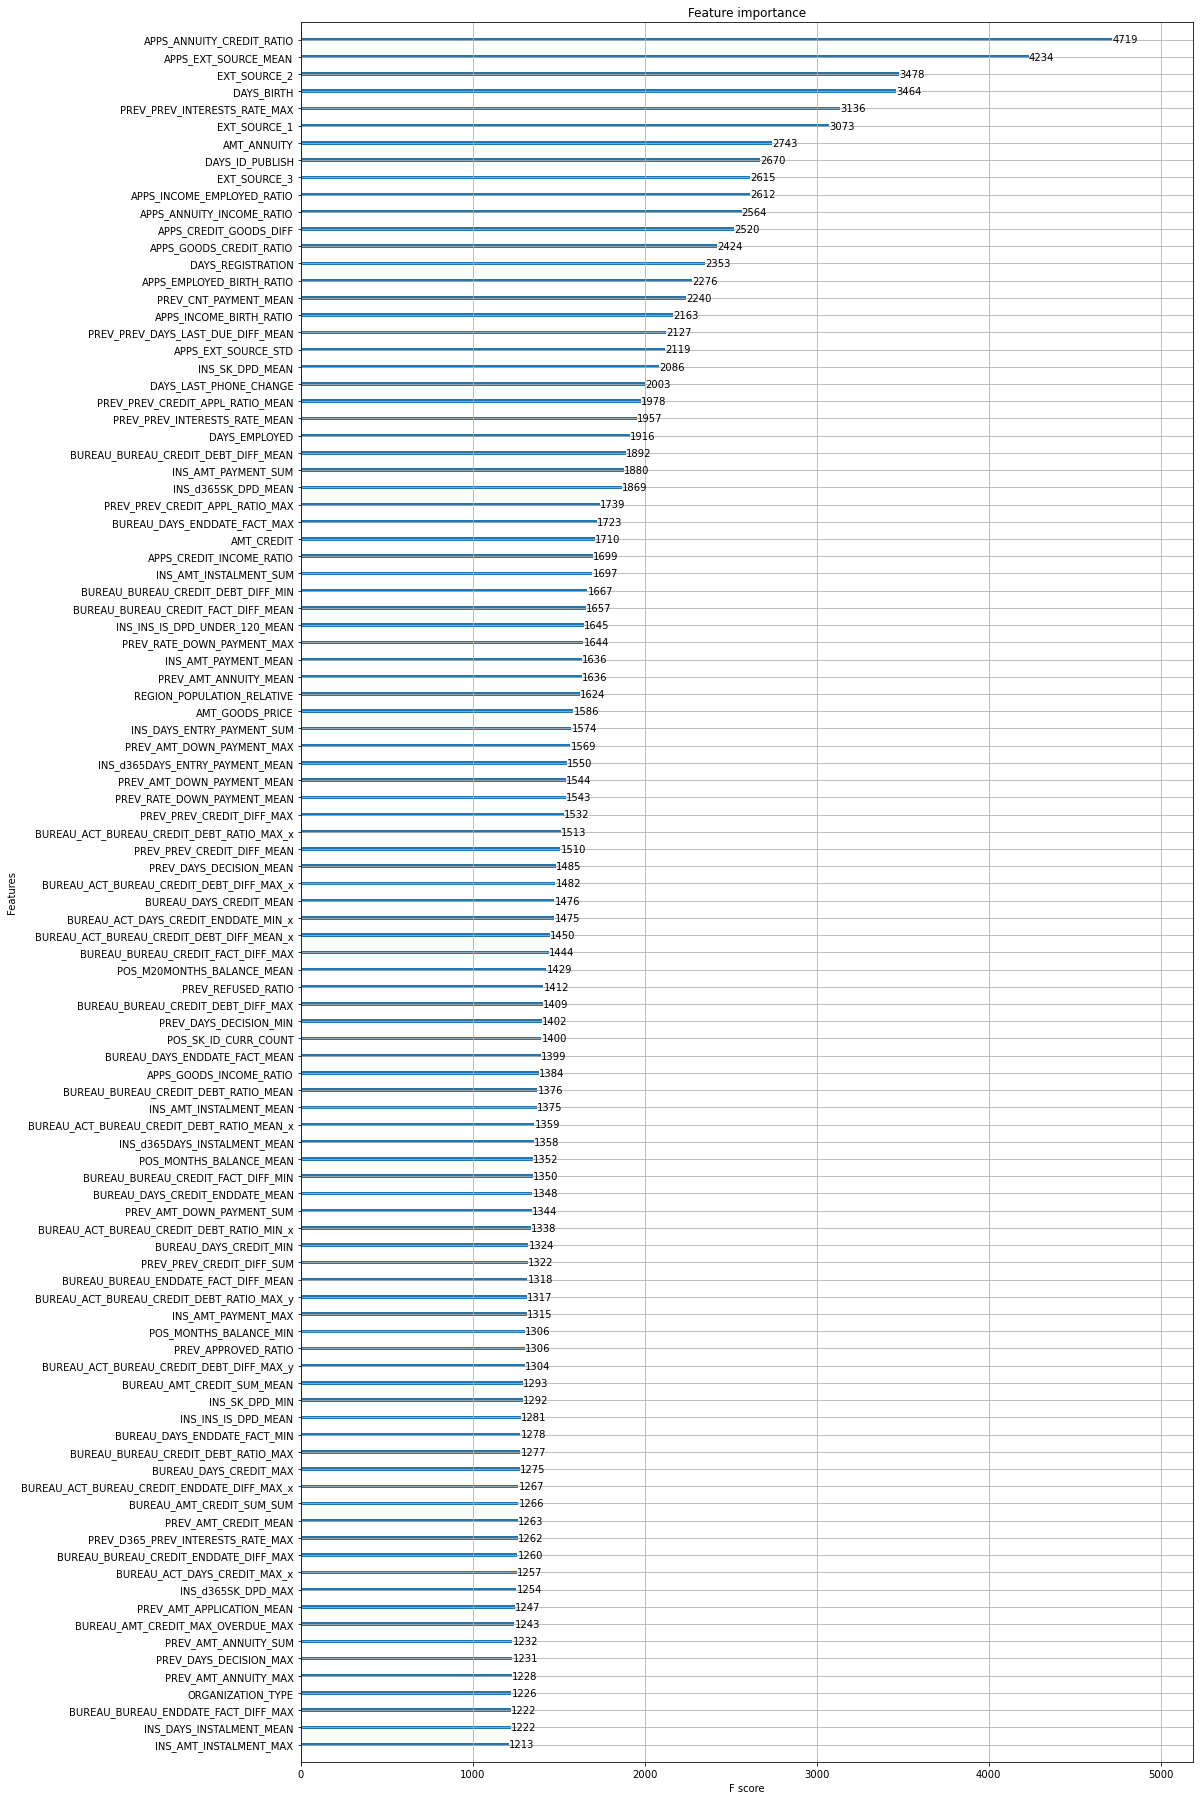

In [18]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16, 32)
plot_importance(clf, max_num_features=100)